In [1]:
from typing import Callable, AsyncIterable
from moveread.core import CoreAPI
import pure_cv as vc
from haskellian import either as E, iter as I, Iter, promise as P, AsyncIter
from moveread.export import core_samples, export_dataset, Sample, export_tfrecords
import tensorflow as tf
import tf_ocr as ocr

2024-04-22 15:52:38.601488: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 15:52:38.813042: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 15:52:39.617013: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 15:52:41.616078: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
core = CoreAPI.debug('../moveread-pipelines/data/demo10/core-out/', blobs_extension='')

In [6]:
await core.games.keys().sync()

[Right(value='a/3/91', tag='right'),
 Right(value='a/2/82', tag='right'),
 Right(value='a/1/74', tag='right'),
 Right(value='a/1/66', tag='right'),
 Right(value='a/5/41', tag='right'),
 Right(value='a/4/57', tag='right'),
 Right(value='b/3/12', tag='right'),
 Right(value='b/6/36', tag='right'),
 Right(value='b/2/11', tag='right'),
 Right(value='b/1/10', tag='right')]

In [7]:
await export_tfrecords(core, 'core10')

2024-04-22 15:53:36.795755: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 15:53:37.012379: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


10 / unknown - elapsed 7.0 secs

2024-04-22 15:53:40.505149: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-04-22 15:53:40.558569: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


1024 / unknown - elapsed 15.1 secs

2024-04-22 15:53:48.866022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1635 / unknown - elapsed 21.5 secs

2024-04-22 15:53:55.186977: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
Dtf = ocr.deserialize_dataset(['core10/data_1.tfrecord'])

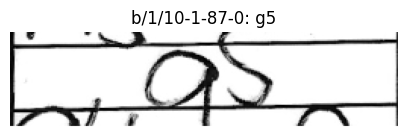

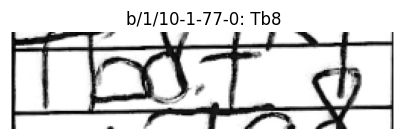

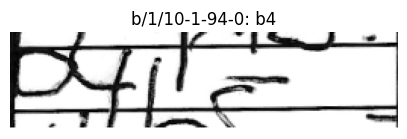

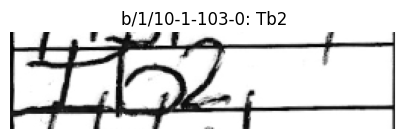

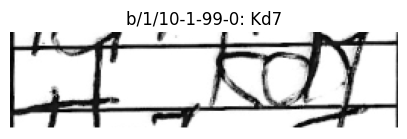

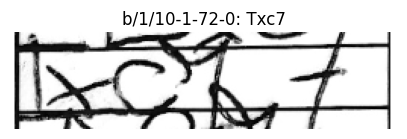

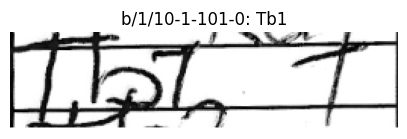

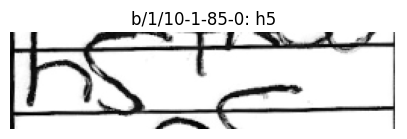

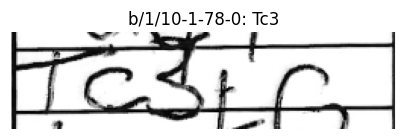

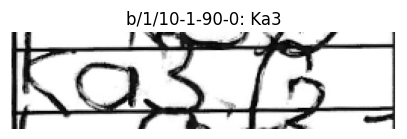

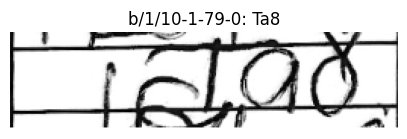

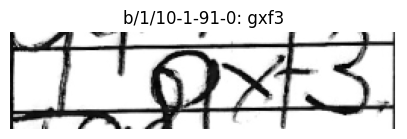

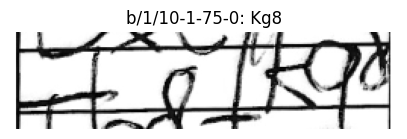

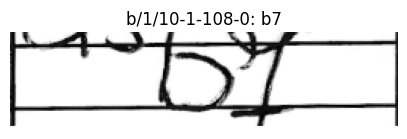

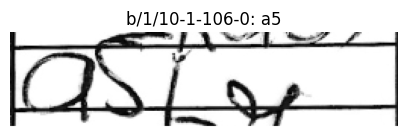

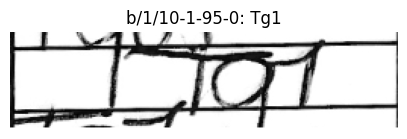

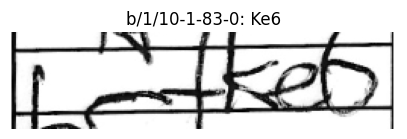

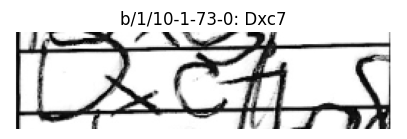

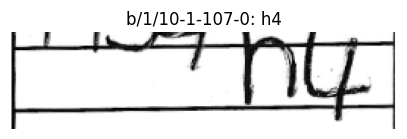

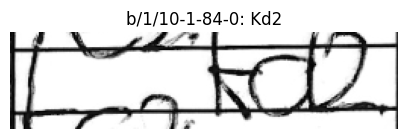

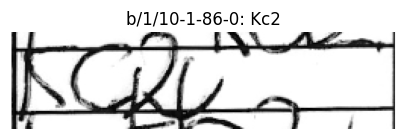

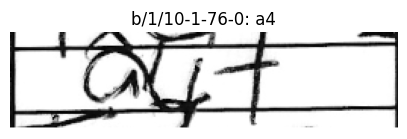

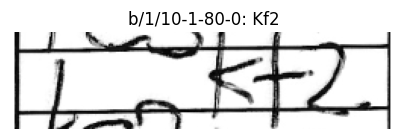

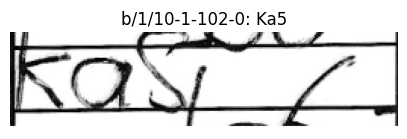

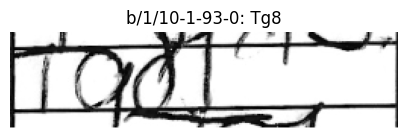

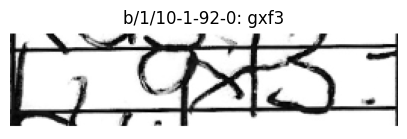

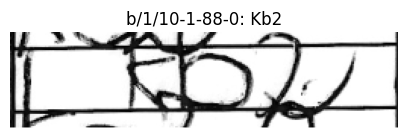

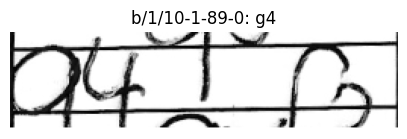

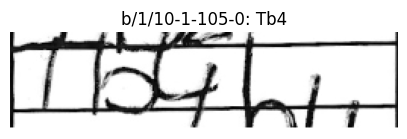

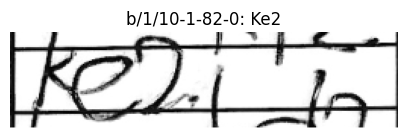

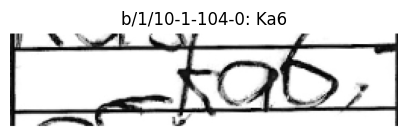

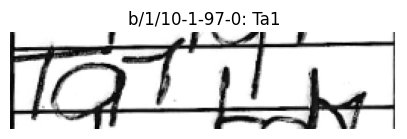

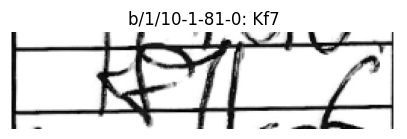

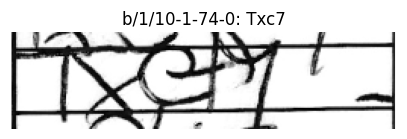

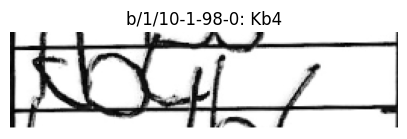

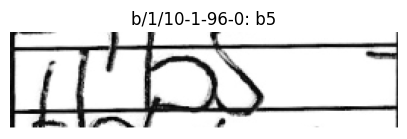

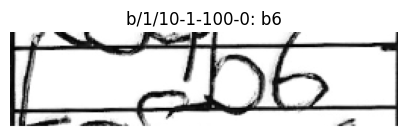

2024-04-22 15:55:44.455183: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [11]:
for x in Dtf.shuffle(1024).take(50):
  txt = f"{x['boxid'].numpy().decode()}: {x['label'].numpy().decode()}"
  display(vc.show((txt, ocr.unflip(x['image']))))